In [86]:
!pip install -r requirements.txt --quiet

In [87]:
import os
import shutil

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from watermark import watermark

In [88]:
# !mkdir Results

In [89]:
# shutil.unpack_archive("test_results.zip", "Results/")

In [90]:
# @title
def visSets(set1: list, set2: list, csvpath: str) -> [DataFrame, DataFrame]:
    """
    Visualize sets of data from csv files in a given directory

    Parameters:
    set1 (list): List of strings indicating well names for set 1
    set2 (list): List of strings indicating well names for set 2
    csvpath (str): Path to directory containing csv files

    Returns:
    Tuple: A tuple of two pandas dataframes, containing data from well_set1 and well_set2 respectively

    """
    dir_list = os.listdir(csvpath)
    print("Files and directories in '", path, "' :")

    well_set1 = pd.DataFrame()
    well_set2 = pd.DataFrame()

    # read csv of set 1
    for well in set1:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set1 = pd.concat([well_set1, csv_set])

    # read csv of set 2
    for well in set2:
        for csv in dir_list:
            if csv.find(well, 0, 3) > -1:
                csv_set = pd.read_csv(csvpath + csv, sep=",")
                csv_set["Well"] = well
                well_set2 = pd.concat([well_set2, csv_set])

    return well_set1, well_set2

In [91]:
# @title
def pltoSet1(B23: DataFrame):
    """
    This function creates a box plot using the Seaborn library. It takes a pandas DataFrame as input
    and visualizes the distribution of "Mean" values for different "Well" categories.
    The plot is created with a logarithmic x axis, horizontal boxes and grid lines for the x axis.
    The y axis is labeled with "Mean".

    Parameters:
    B23 (pd.DataFrame): A pandas DataFrame with columns "Well" and "Mean".

    Returns:
    None
    """
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(x="Well", y="Mean", data=B23, width=0.6, palette="vlag",showfliers=False,)

    # Add in points to show each observation
    # sns.swarmplot(x="Well", y="Mean", data=B23,
    #              size=3, palette="vlag")

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)

In [92]:
# @title
def norm_test(data: list, name: str):
    """
    Performs a normality test on a given data sample and returns a conclusion on whether the data is from a normal distribution.

    Inputs:
    data (list): A list of numerical values representing the data sample
    name (str): A string that represents the name of the data sample

    Outputs:
    None

    Side effects:
    Prints the p-value and the conclusion of the normality test on the data sample.

    Example:
    >>> norm_test([1, 2, 3, 4, 5], "Sample Data")
    p = 0.157298
    null hypothesis: Sample Data comes from a normal distribution
    The null hypothesis cannot be rejected
    """
    k2, p = normaltest(data)
    alpha = 1e-3
    print("p = {:g}".format(p))
    print("null hypothesis: {} comes from a normal distribution".format(name))
    if p < alpha:  # null hypothesis: Data2 (Aptamil) from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print("")

In [93]:
# @title
def visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):
    """
    visStats(set1: list, set2: list, path: str, stat_text: str, fig_name: str):

    This function generates visualization of statistics between two sets of data and saves the figure to current path.

    set1: list
    A list of strings containing the name of each well in the first set.
    set2: list
    A list of strings containing the name of each well in the second set.
    path: str
    The path to the directory where the figure will be saved.
    stat_text: str
    The text to be added to the plot as a title or subtitle.
    fig_name: str
    The name of the figure file to be saved.

    Returns: None
    """

    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()

    pltoSet1(well_set1)
    pltoSet1(well_set2)

    print("Statistics:")
    print("")

    csv_all = pd.concat([well_set1, well_set2])

    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(
        x="Well",
        y="Mean",
        data=csv_all,
        width=0.6,
        hue="Set",
        palette=["m", "g"],
    )

    # Add in points to show each observation
    # sns.swarmplot(x="Well", y="Mean", data=B23,
    #              size=3, palette="vlag")

    # Tweak the visual presentation
    # ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    # sns.despine(trim=True, left=True)

    for well in set1:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    for well in set2:
        norm_test(csv_all[csv_all["Well"] == well].Mean, well)

    # pvalues with scipy:
    stat_results = [
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[0]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[1]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[0]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[1]].Mean,
            alternative="two-sided",
        ),
        mannwhitneyu(
            csv_all[csv_all["Well"] == set1[2]].Mean,
            csv_all[csv_all["Well"] == set2[2]].Mean,
            alternative="two-sided",
        ),
        # mannwhitneyu(robots, sound, alternative="two-sided")
    ]

    pvalues = [result.pvalue for result in stat_results]
    print(pvalues)

    pairs = [
        (set1[0], set2[0]),
        (set1[0], set2[1]),
        (set1[0], set2[2]),
        (set1[1], set2[0]),
        (set1[1], set2[1]),
        (set1[1], set2[2]),
        (set1[2], set2[0]),
        (set1[2], set2[1]),
        (set1[2], set2[2]),
        #  ('Robots', 'Sound')   # 'Robots' vs 'Sound'
    ]

    formatted_pvalues = [f"p={p:.2e}" for p in pvalues]

    # prepare plots
    subcat_palette = sns.dark_palette("#8BF", reverse=True, n_colors=5)
    states_palette = sns.color_palette("YlGnBu", n_colors=5)

    cmap = sns.color_palette("colorblind")
    plotting_parameters = {
        "data": csv_all,
        "x": "Well",
        "y": "Mean",
        "showfliers": False,
        "width": 0.6,
        #'hue':"Set",
        "palette": [cmap[0], cmap[1], cmap[4], cmap[0], cmap[1], cmap[4]],
    }

    # show results
    with sns.plotting_context("notebook", font_scale=1.4):
        # Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))

        # Plot with seaborn
        sns.boxplot(**plotting_parameters)

        # Add annotations
        annotator = Annotator(ax, pairs, **plotting_parameters)
        ## p values
        # annotator.set_custom_annotations(formatted_pvalues)
        # annotator.annotate()

        ## <> p values
        annotator.configure(text_format="simple")
        annotator.set_pvalues(pvalues).annotate()

        # Label and show
        plt.title(stat_text, y=1.06)

        plt.savefig("./" + fig_name + ".png", bbox_inches="tight")
        plt.show()

In [94]:
path = "0209_Results_4h/"

dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
# prints all files
print(dir_list)

Files and directories in ' 0209_Results_4h/ ' :
['B2_AllResults_2023-2-9_Results.csv', 'B3_AllResults_2023-2-9_Results.csv', 'B4_AllResults_2023-2-9_Results.csv', 'B6_AllResults_2023-2-9_Results.csv', 'B7_AllResults_2023-2-9_Results.csv', 'B8_AllResults_2023-2-9_Results.csv', 'C2_AllResults_2023-2-9_Results.csv', 'C3_AllResults_2023-2-9_Results.csv', 'C4_AllResults_2023-2-9_Results.csv', 'C6_AllResults_2023-2-9_Results.csv', 'C7_AllResults_2023-2-9_Results.csv', 'C8_AllResults_2023-2-9_Results.csv', 'D2_AllResults_2023-2-9_Results.csv', 'D3_AllResults_2023-2-9_Results.csv', 'D4_AllResults_2023-2-9_Results.csv', 'D6_AllResults_2023-2-9_Results.csv', 'D7_AllResults_2023-2-9_Results.csv', 'D8_AllResults_2023-2-9_Results.csv']


In [95]:
# create an Empty DataFrame object
df = pd.DataFrame()
 
# append columns to an empty DataFrame
df['Set'] = []
df['Mean'] = []
df['Area'] = []
df['MoA'] = []

print(df)

Empty DataFrame
Columns: [Set, Mean, Area, MoA]
Index: []


In [96]:
# CHOK1 kontrola: B4, C4, D4
# vs
# CHOK1 Val30: B2, C2, D2; a CHOK1 Val15: B3, C3 a D3

# set1 = ["B4", "C4", "D4"] #kontrola
# set2 = ["B3", "C3", "D3"]

# set1 = ["B4", "C4", "D4"] #kontrola
# set2 = ["B2", "C2", "D2"]


# HeLa kontrola: B8, C8, D8
# Vs
# HeLa Val30: B6, C6, D6; a HeLa Val15: B7, C7 a D7

# set1 = ["B8", "C8", "D8"] #kontrola
# set2 = ["B6", "C6", "D6"]

set1 = ["B8", "C8", "D8"] #kontrola
set2 = ["B7", "C7", "D7"]

0
Files and directories in ' 0209_Results_4h/ ' :
Control
stats
Files and directories in ' 0209_Results_4h/ ' :
Mean Brigthnes
Set1
0.2424950910433071
Set2
0.6918740173960316
Mean Area
Set1
0.05252235974409449
Set2
0.03979923892362055
--Mean/Area--
Set1
4.616987740551257
Set2
17.38410170917639
Fold: 3.7652475349871244
Files and directories in ' 0209_Results_4h/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 7.67182e-289
null hypothesis: B3 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C3 comes from a normal distribution
The null hypothesis can be rejected

p = 1.76046e-273
null hypothesis: D3 comes from a normal distribution
The null hypothesis can be rejected

[3.6541282368724184e-12, 0.0009769386397596423, 0.0014090409153639254, 0.004789316726424796, 0.01886016030027646, 0.09867099073254584, 0.767667372095383, 9.188752038283913e-06, 3.3574263952626826e-05]
D4 vs. B3: Custom statistical test, P_val:7.677e-01
C4 vs. B3: Custom statistical test, P_val:4.789e-03
D4 vs. C3: Custom statistical test, P_val:9.189e-06
B4 vs. B3: Custom statistical te

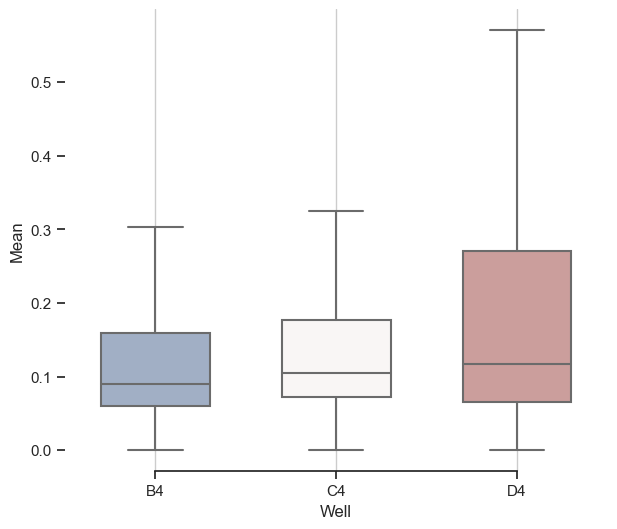

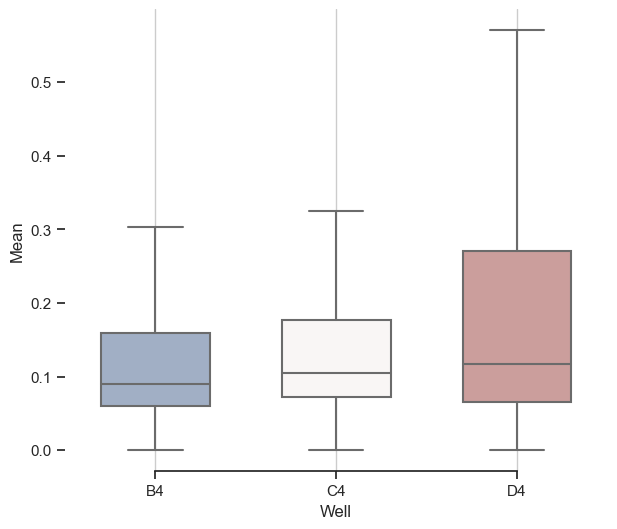

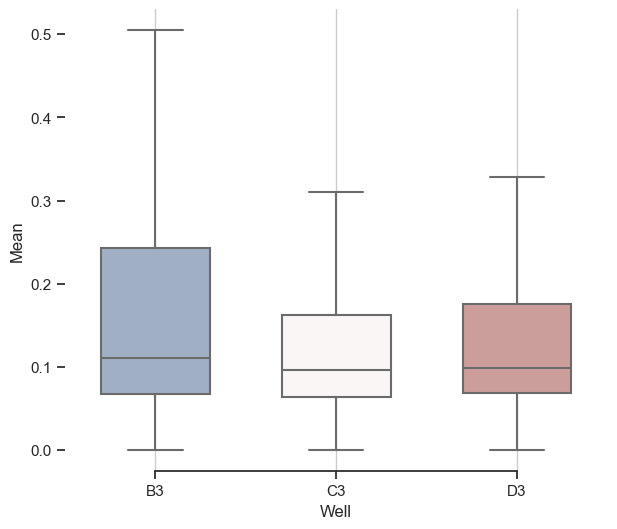

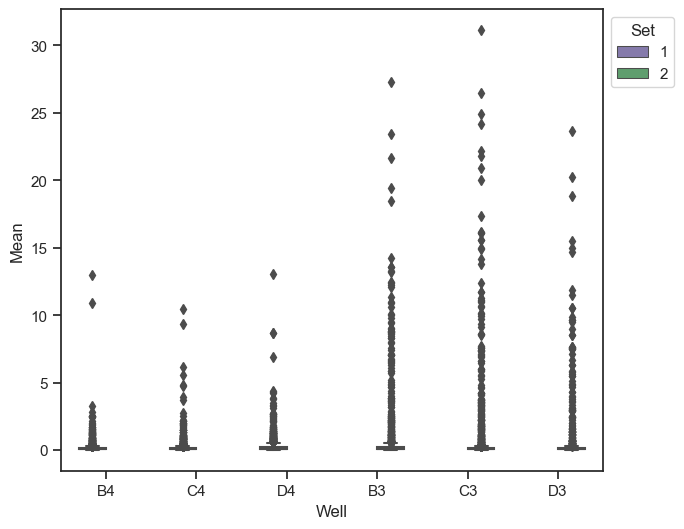

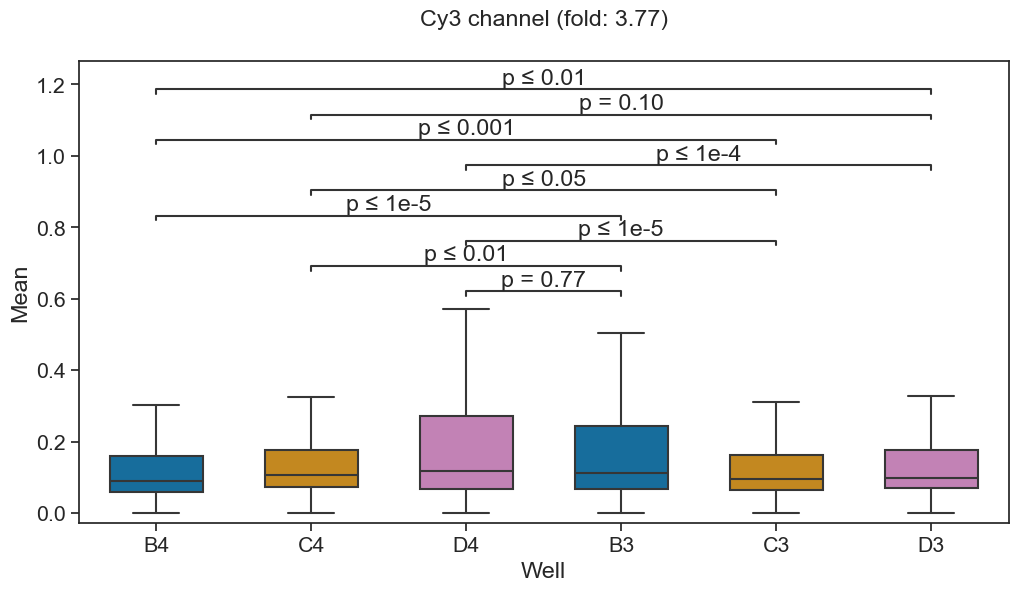

1
Files and directories in ' 0209_Results_4h/ ' :
Control
stats
Files and directories in ' 0209_Results_4h/ ' :
Mean Brigthnes
Set1
0.2424950910433071
Set2
0.7301925566231983
Mean Area
Set1
0.05252235974409449
Set2
0.035090470144131775
--Mean/Area--
Set1
4.616987740551257
Set2
20.808856467980647
Fold: 4.5070200826429145
Files and directories in ' 0209_Results_4h/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C4 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D4 comes from a normal distribution
The null hypothesis can be rejected

p = 3.92874e-294
null hypothesis: B2 comes from a normal distribution
The null hypothesis can be rejected

p = 4.60405e-227
null hypothesis: C2 comes from a normal distribution
The null hypothesis can be rejected

p = 5.46935e-225
null hypothesis: D2 comes from a normal distribution
The null hypothesis can be rejected

[3.576592186722655e-09, 1.2299462427818194e-05, 0.12491205719203691, 0.04453125884237928, 0.4649783384635503, 0.01106294118176752, 0.546855196217945, 0.20061497724746702, 1.5303400811387558e-05]
D4 vs. B2: Custom statistical test, P_val:5.469e-01
C4 vs. B2: Custom statistical test, P_val:4.453e-02
D4 vs. C2: Custom statistical test, P_val:2.006e-01
B4 vs. B2: Custom statistic

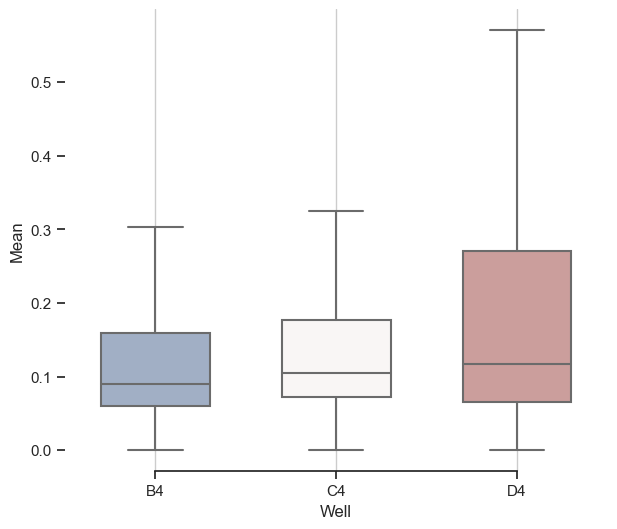

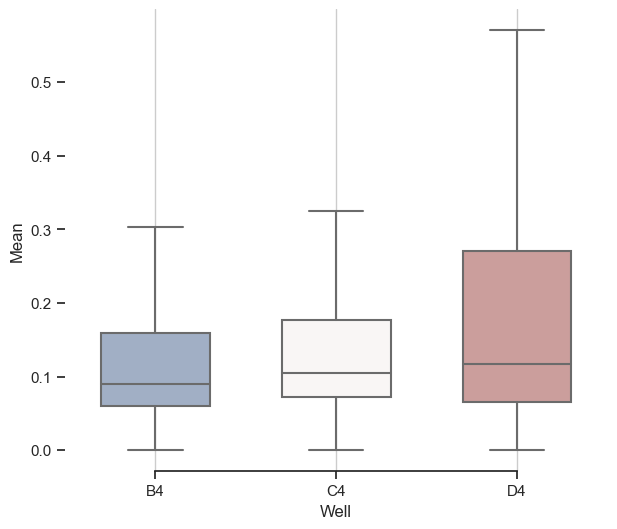

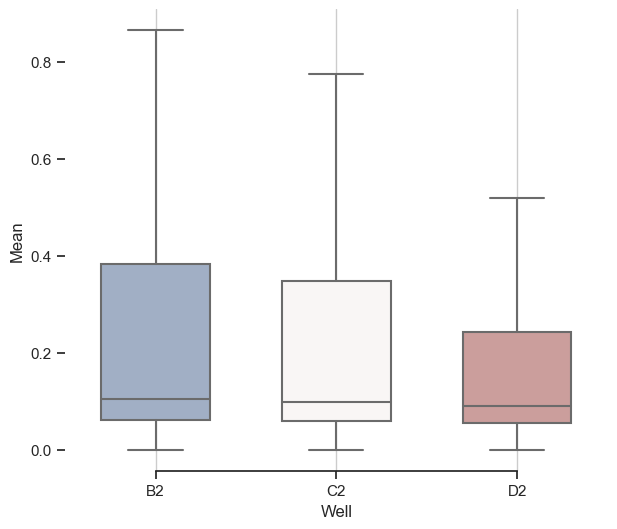

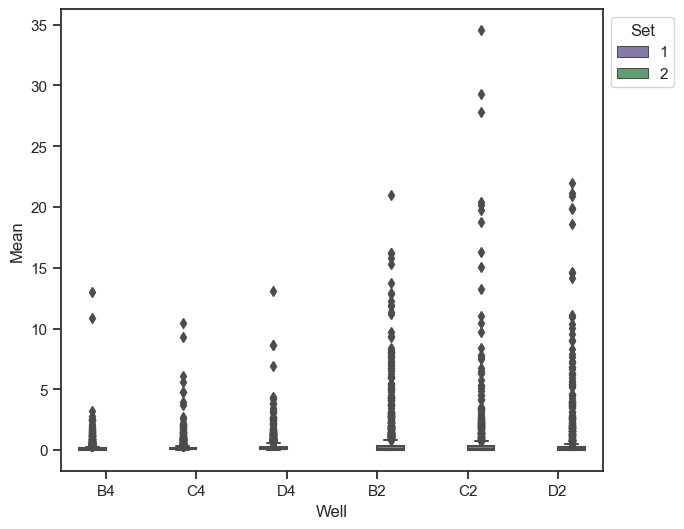

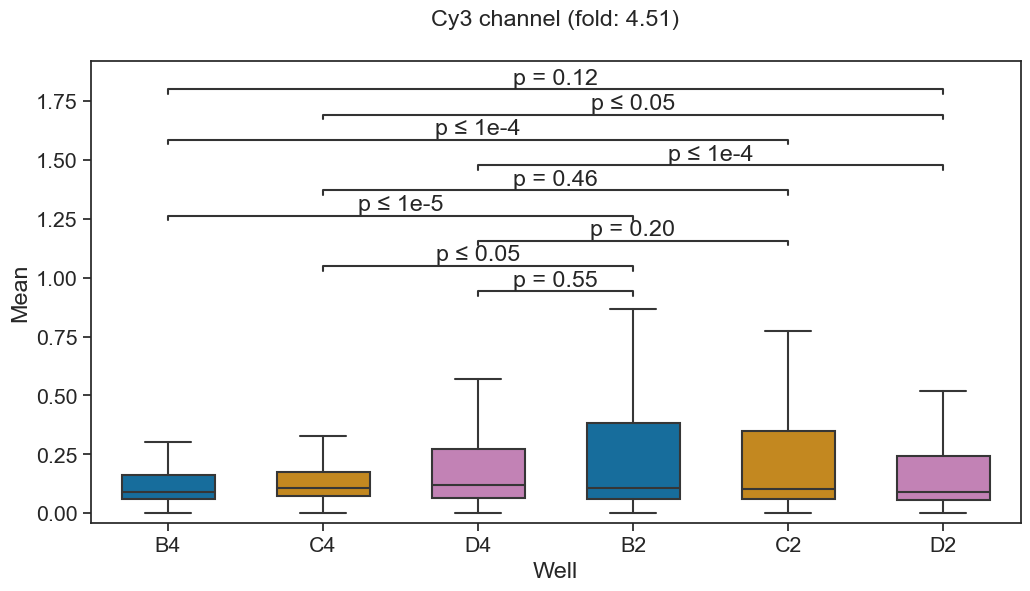

2
Files and directories in ' 0209_Results_4h/ ' :
Control
stats
Files and directories in ' 0209_Results_4h/ ' :
Mean Brigthnes
Set1
0.0317461461619348
Set2
0.03783724502617801
Mean Area
Set1
0.08010618997546443
Set2
0.07284471937172776
--Mean/Area--
Set1
0.3963007873880691
Set2
0.5194233068988013
Fold: 1.3106794723326327
Files and directories in ' 0209_Results_4h/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C6 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D6 comes from a normal distribution
The null hypothesis can be rejected

[0.01561974715586052, 0.0013878291236684161, 9.193505154505867e-08, 9.217595776932805e-16, 0.013294142640820123, 0.8701008360194764, 0.0004114482689676068, 0.036386461507591464, 1.4849325581263479e-05]
D8 vs. B6: Custom statistical test, P_val:4.114e-04
C8 vs. B6: Custom statistical test, P_val:9.218e-16
D8 vs. C6: Custom statistical test, P_val:3.639e-02
B8 vs. B6: Custom statistical test, P_val:1.562e-02
C

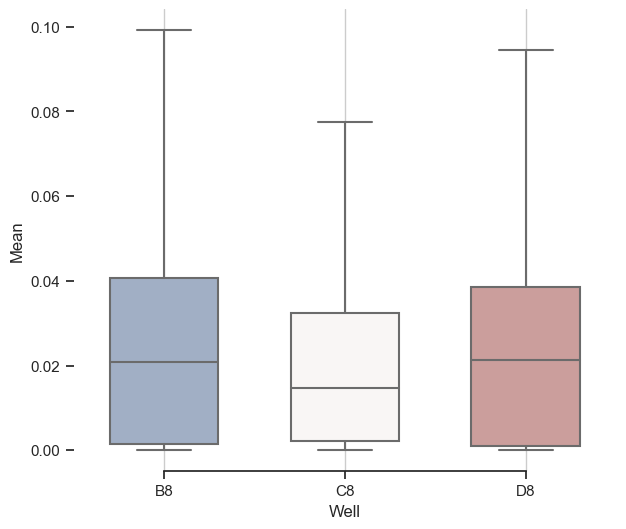

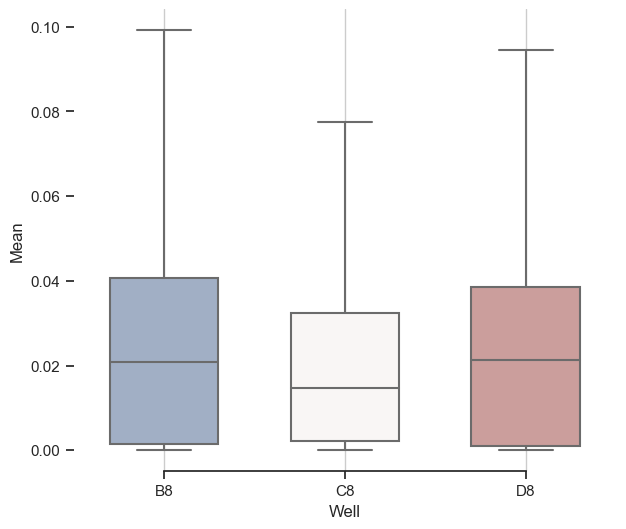

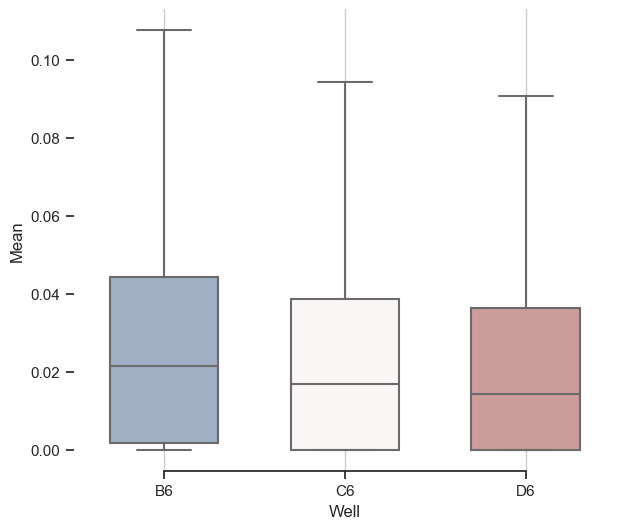

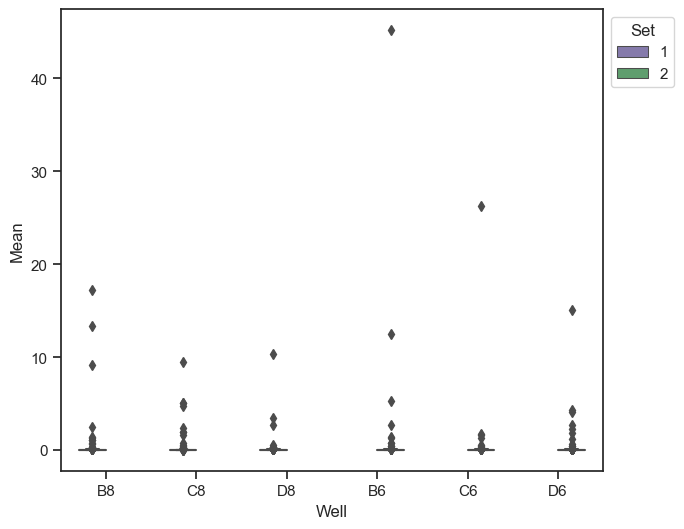

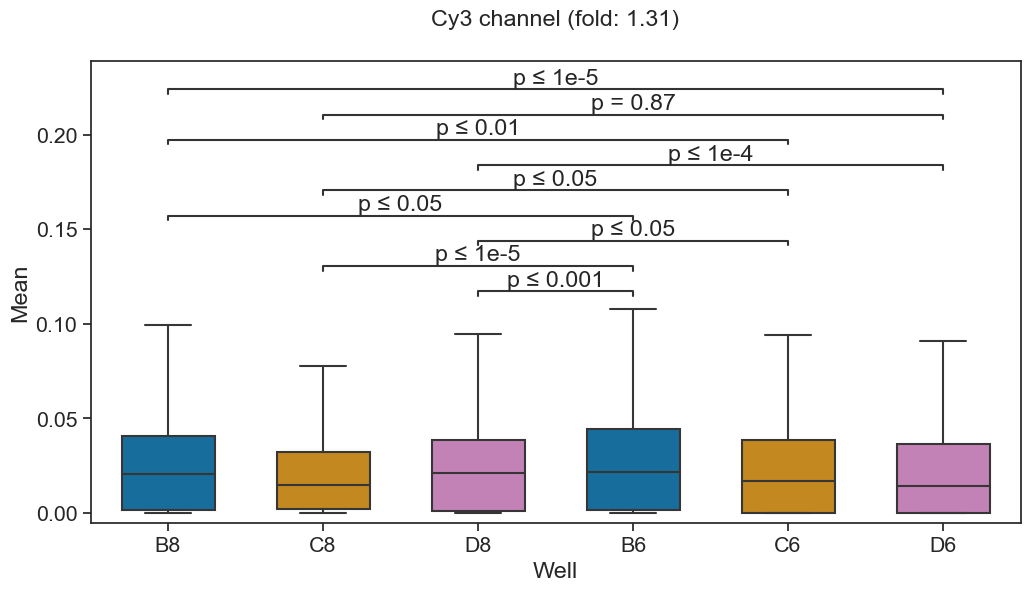

3
Files and directories in ' 0209_Results_4h/ ' :
Control
stats
Files and directories in ' 0209_Results_4h/ ' :
Mean Brigthnes
Set1
0.0317461461619348
Set2
0.02905646578782172
Mean Area
Set1
0.08010618997546443
Set2
0.0749447562251517
--Mean/Area--
Set1
0.3963007873880691
Set2
0.38770512109652144
Fold: 0.9783102467491932
Files and directories in ' 0209_Results_4h/ ' :


C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
C:\Users\mspat\AppData\Local\Temp\ipykernel_29532\4163667662.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


Statistics:

p = 0
null hypothesis: B8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D8 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: B7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: C7 comes from a normal distribution
The null hypothesis can be rejected

p = 0
null hypothesis: D7 comes from a normal distribution
The null hypothesis can be rejected

[0.6225775678122916, 1.537112987195604e-07, 1.6915515682765677e-11, 9.715465374446548e-11, 0.9109465644309005, 0.06646069906131993, 0.13117824099465522, 1.974123466976125e-05, 1.7545293699649952e-08]
D8 vs. B7: Custom statistical test, P_val:1.312e-01
C8 vs. B7: Custom statistical test, P_val:9.715e-11
D8 vs. C7: Custom statistical test, P_val:1.974e-05
B8 vs. B7: Custom statistical test, P_val:6.226e-01
C8 

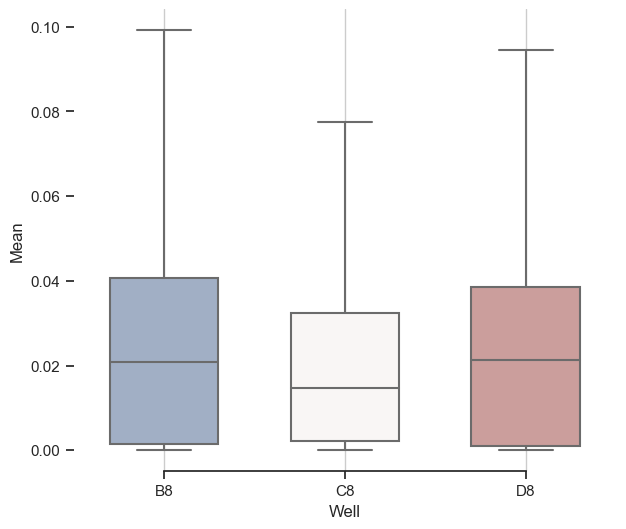

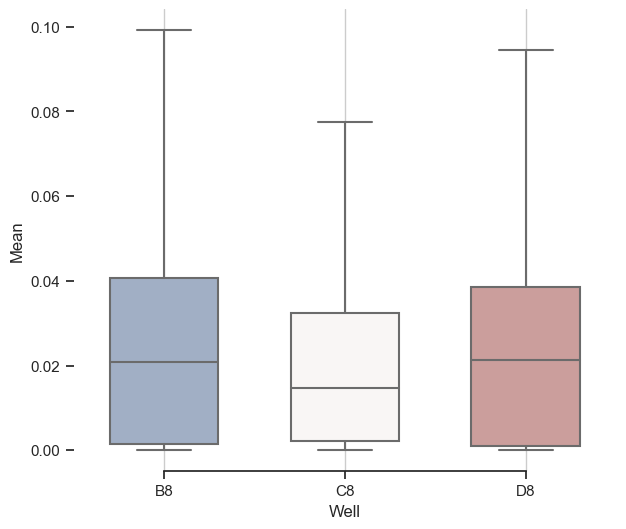

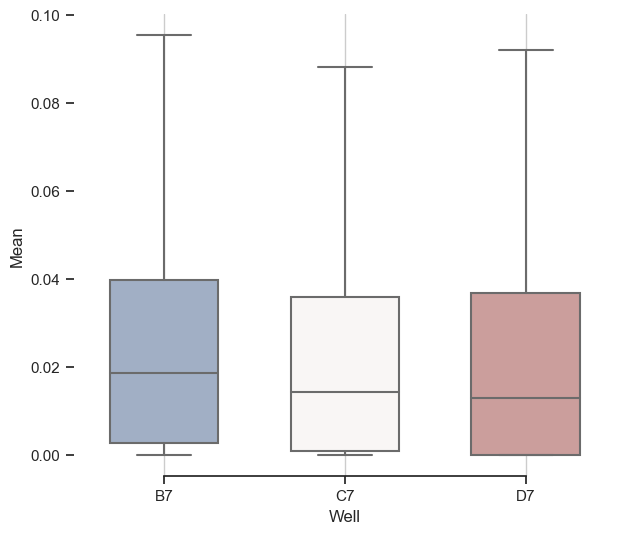

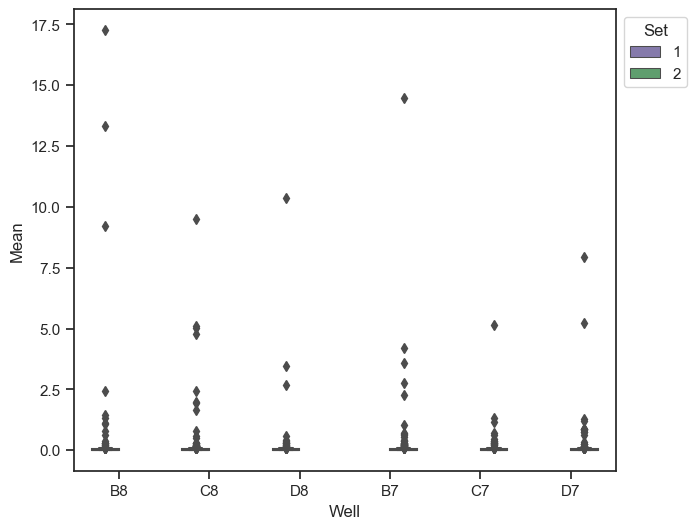

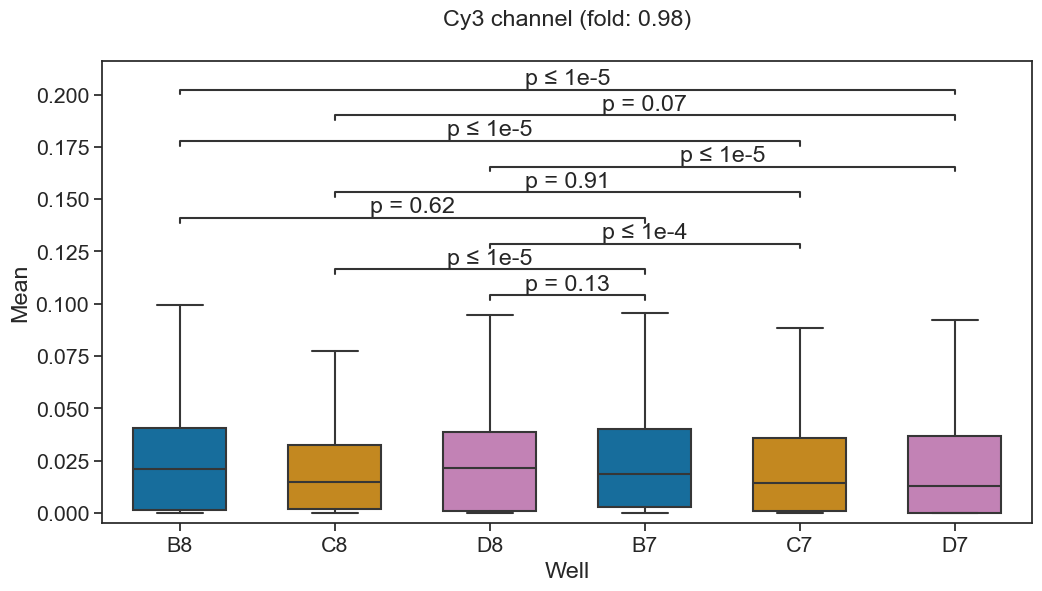

In [97]:

for s in range(4):
    print(s)
    if s ==0:
        set1 = ["B4", "C4", "D4"] #kontrola
        set2 = ["B3", "C3", "D3"]
    if s ==1:
        set1 = ["B4", "C4", "D4"] #kontrola
        set2 = ["B2", "C2", "D2"]
    if s ==2:
        set1 = ["B8", "C8", "D8"] #kontrola
        set2 = ["B6", "C6", "D6"]
    if s ==3:
        set1 = ["B8", "C8", "D8"] #kontrola
        set2 = ["B7", "C7", "D7"]
        
    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1.Mean.describe()
    
    well_set2["Set"] = 2
    well_set2.Mean.describe()
    
    print("Control")
    sns.set_theme(style="ticks")

    # Initialize the figure with a logarithmic x axis
    f, ax = plt.subplots(figsize=(7, 6))

    # Plot the orbital period with horizontal boxes
    sns.boxplot(x="Well", y="Mean", data=well_set1, width=0.6, palette="vlag",showfliers=False,)

    # Add in points to show each observation
    # sns.swarmplot(x="Well", y="Mean", data=B23,
    #              size=3, palette="vlag")

    # Tweak the visual presentation
    ax.xaxis.grid(True)
    ax.set(ylabel="Mean")
    sns.despine(trim=True, left=True)
    
    print("stats")
    well_set1, well_set2 = visSets(set1, set2, path)
    well_set1["Set"] = 1
    well_set1["Well"].describe()

    well_set2["Set"] = 2
    well_set2["Well"].describe()


    print("Mean Brigthnes")
    print("Set1")
    print(well_set1["Mean"].mean())
    print("Set2")
    print(well_set2["Mean"].mean())

    print("Mean Area")
    print("Set1")
    print(well_set1["Area"].mean())
    print("Set2")
    print(well_set2["Area"].mean())
    
    new_row = {'Set':"".join(set1), 'Mean':well_set1["Mean"].mean(), 'Area':well_set1["Area"].mean(), 'MoA': well_set1["Mean"].mean()/well_set1["Area"].mean()}
    df = df.append(new_row, ignore_index=True)
    new_row = {'Set':"".join(set2), 'Mean':well_set2["Mean"].mean(), 'Area':well_set2["Area"].mean(), 'MoA': well_set2["Mean"].mean()/well_set2["Area"].mean()}
    df = df.append(new_row, ignore_index=True)

    print("--Mean/Area--")
    print("Set1")
    m2a1 = well_set1["Mean"].mean() / well_set1["Area"].mean()
    print(m2a1)
    print("Set2")
    m2a2 = well_set2["Mean"].mean() / well_set2["Area"].mean()
    print(m2a2)

    print("Fold: {}".format(m2a2 / m2a1))
    
    visStats(set1, set2, path, "Cy3 channel (fold: {:.2f})".format(m2a2 / m2a1), "vis4h_"+"".join(set1) + "".join(set2))

In [98]:
df

,Set,Mean,Area,MoA
0,B4C4D4,0.242495,0.052522,4.616988
1,B3C3D3,0.691874,0.039799,17.384102
2,B4C4D4,0.242495,0.052522,4.616988
3,B2C2D2,0.730193,0.035090,20.808856
4,B8C8D8,0.031746,0.080106,0.396301
5,B6C6D6,0.037837,0.072845,0.519423
6,B8C8D8,0.031746,0.080106,0.396301
7,B7C7D7,0.029056,0.074945,0.387705


In [99]:
for i in range(0,len(df),2):
    print(df.iloc[i+1].Set + " over " + df.iloc[i].Set + ",fold: {}".format(df.iloc[i+1].MoA/df.iloc[i].MoA))

B3C3D3 over B4C4D4,fold: 3.7652475349871244
B2C2D2 over B4C4D4,fold: 4.5070200826429145
B6C6D6 over B8C8D8,fold: 1.3106794723326327
B7C7D7 over B8C8D8,fold: 0.9783102467491932


In [100]:
for i in range(0,len(df),2):
    print(df.iloc[i+1].Set + " over " + df.iloc[i].Set + ", area change: {:.2f} %".format((df.iloc[i+1].Area/df.iloc[i].Area)*100))

B3C3D3 over B4C4D4, area change: 75.78 %
B2C2D2 over B4C4D4, area change: 66.81 %
B6C6D6 over B8C8D8, area change: 90.94 %
B7C7D7 over B8C8D8, area change: 93.56 %


In [101]:
watermark(iversions=True, globals_=globals())
print(watermark())

Last updated: 2023-02-11T11:47:50.617297+01:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.9.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 60 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [102]:
print(
    watermark(
        packages="watermark,numpy,pandas,seaborn,scipy,statannotations,statsmodels"
    )
)

watermark      : 2.3.1
numpy          : 1.24.1
pandas         : 1.5.3
seaborn        : 0.11.2
scipy          : 1.10.0
statannotations: 0.5.0
statsmodels    : 0.13.5

